# Assignment 2
* In this assignment you will be working with three data files from iMDB:
    * cast.csv
    * release_dates.csv
    * titles.csv
* Using the appropriate file(s), answer the following questions
* Some questions can be completed with one-liners while others are a bit more involved
* Where appropriate, answers should also provide brief commentary
* Exclude data that doen't make senss, i.e. data from the future
* Once complete upload this notebook to your classwork Github repo and post the link on Canvas 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cast = pd.read_csv("Archive/cast.csv")
dates = pd.read_csv("Archive/release_dates.csv")
titles = pd.read_csv("Archive/titles.csv")

### 1. Conduct a high level assessment of the three data files, i.e. how many records are there, what kind of data, etc. Summarize your findings with annotation. 

In [27]:
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [10]:
dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


In [11]:
titles.head()

,title,year
0,Ankara ekspresi,1952
1,"Ans Vaterland, ans teure",1915
2,Miss Mohini,2002
3,La vera madre,1999
4,O Amerikanos,1993


In [5]:
print(f'The cast data file has {len(cast)} records')
print(f'The release dates data file has {len(dates)} records')
print(f'The titles data file has {len(titles)} records')

The cast data file has 3442902 records
The release dates data file has 443486 records
The titles data file has 226013 records


In [6]:
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3442902 entries, 0 to 3442901
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 157.6+ MB


In [7]:
dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443486 entries, 0 to 443485
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   title    443486 non-null  object
 1   year     443486 non-null  int64 
 2   country  443486 non-null  object
 3   date     443486 non-null  object
dtypes: int64(1), object(3)
memory usage: 13.5+ MB


In [8]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226013 entries, 0 to 226012
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   226013 non-null  object
 1   year    226013 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ MB


The cast dataset has 3442902 observations and 6 variables. It contains information about the cast including the title of the movies, the year, the name of the actor, and the role and character in the movie. The dates file has 443486 records including the date, title of the movie, year, and country. The titles dataset contains 226013 movies including the title and the year of each movie.

### 2. How many movies have the title North by Northwest

In [35]:
titles[titles['title'].str.contains("North by Northwest")].shape[0]

1

### 3. How many version of Hamlet are there, when was the first made? the last?

In [43]:
titles[titles['title'].str.contains("Hamlet")].shape[0]

55

In [41]:
titles[titles['title'].str.contains("Hamlet")]['year'].min()

1910

In [42]:
titles[titles['title'].str.contains("Hamlet")]['year'].max()

2018

### 4. List all the movies called Treasure Island from oldest to newest

In [44]:
titles[titles['title'] == 'Treasure Island'].sort_values(by='year')

,title,year
180911,Treasure Island,1918
108853,Treasure Island,1920
87953,Treasure Island,1934
126321,Treasure Island,1950
190233,Treasure Island,1972
122150,Treasure Island,1973
52099,Treasure Island,1985
36752,Treasure Island,1999


### 5. How many movies were made in 1950? 1980? 2000? What conclusions can you draw from these data points?

In [51]:
movies_1950 = titles[titles['year'] == 1950].shape[0]
movies_1980 = titles[titles['year'] == 1980].shape[0]
movies_2000 = titles[titles['year'] == 2000].shape[0]

print(f'There were {movies_1950} movies made in 1950, {movies_1980} in 1980, and {movies_2000} in 2000')

There were 1109 movies made in 1950, 1750 in 1980, and 2568 in 2000


Given the numbers, it is clear that the number of movies made between 1950 and 2000 has significantly increased. Several factors could contribute to the increase in movie production. These may include advancements in technology, such as the availability of more affordable filming equipment and digital filmmaking, as well as changes in distribution channels, such as the rise of streaming platforms. Additionally, increased globalization and access to international markets may have also fueled the growth in movie production.

### 6. How big was the cast of Metropolis


In [53]:
cast[cast['title'] == 'Metropolis']['name'].nunique()

31

### 7. How many roles for actors were there 1950's? 1990's

In [58]:
cast[(cast['year'] >= 1950) & (cast['year'] < 1960) & (cast['type'] == 'actor')].shape[0]


153559

In [59]:
cast[(cast['year'] >= 1990) & (cast['year'] < 2000) & (cast['type'] == 'actor')].shape[0]

245713

### 8. How many roles for actors & actresses over time? Output should be a line graph

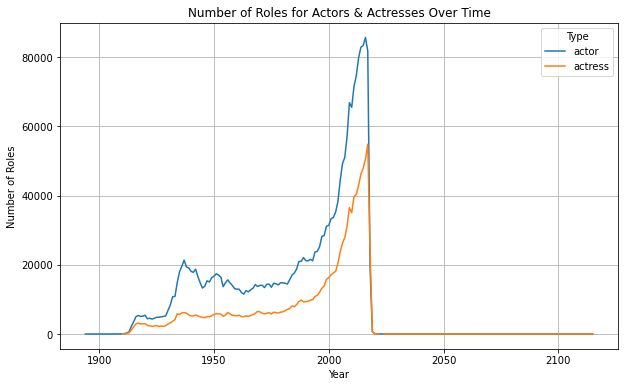

In [60]:
roles_over_time = cast.groupby(['year', 'type']).size().unstack()

# Plot the line graph
roles_over_time.plot(kind='line', figsize=(10, 6))
plt.title('Number of Roles for Actors & Actresses Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Roles')
plt.legend(title='Type')
plt.grid(True)
plt.show()

### 9. How many "leading roles" were there in the 2000's?

In [70]:
cast[(cast['year'] >= 2000) & (cast['year'] < 2010) & (cast['n'] == 1)].shape[0]

23593

### 10. How many roles received no ranking in the 2000's? 1950's. What conclusions can you draw from these two data points?

In [73]:
cast[(cast['year'] >= 2000) & (cast['year'] < 2010) & cast['n'].isna()].shape[0]

232037

In [74]:
cast[(cast['year'] >= 1950) & (cast['year'] < 1960) & cast['n'].isna()].shape[0]

95406

In the 2000's, there were 232037 roles that received no ranking and 95406 roles that received no ranking in the 1950's. The significantly higher number of roles with no ranking in the 2000s compared to the 1950s suggests a potential shift in role attribution practices over time. It could also indicate a broader diversity of roles or a greater complexity in character development. The higher number of roles with no ranking in the 2000s could reflect the overall growth and globalization of the film industry, reflecting a higher overall number of roles in the 2000's compared to the 1950's. 

### 11. Plot the number of films made in each decade

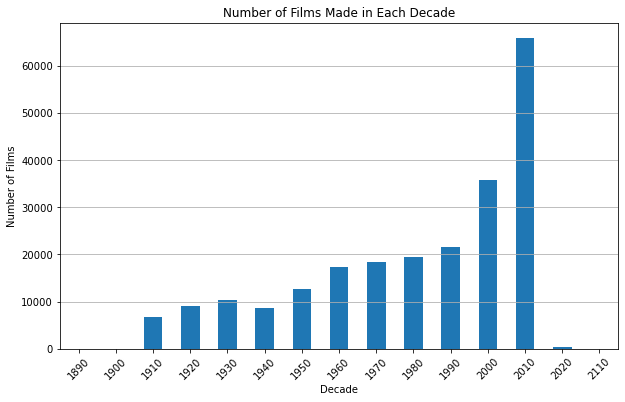

In [75]:
titles['decade'] = (titles['year'] // 10) * 10

films_per_decade = titles.groupby('decade').size()

films_per_decade.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Films Made in Each Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Films')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### 12. Plot the number of films with a Rustler character over time

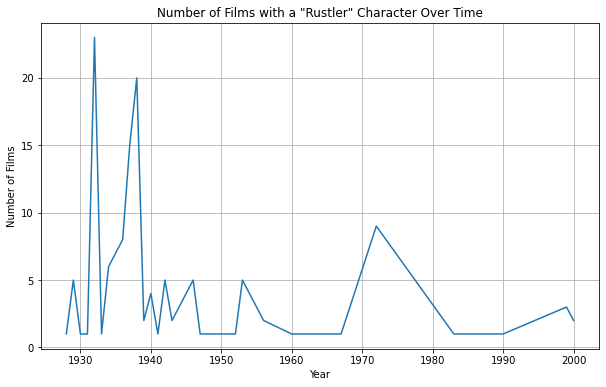

In [76]:
rustler_films = cast[cast['character'] == 'Rustler']

# Group the data by year and count the number of films with the "Rustler" character
rustler_films_over_time = rustler_films.groupby('year').size()

rustler_films_over_time.plot(kind='line', figsize=(10, 6))
plt.title('Number of Films with a "Rustler" Character Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Films')
plt.grid(True)
plt.show()

### 13. What are the top ten character names of all time?

In [81]:
cast['character'].value_counts().head(10)

Himself        19637
Dancer         12019
Extra          10848
Reporter        7818
Doctor          6963
Party Guest     6786
Student         6631
Policeman       6424
Bartender       6290
Herself         6269
Name: character, dtype: int64

### 14. Which actor appeared in the most films in the 1990's decade?

In [85]:
cast[(cast['year'] >= 1990) & (cast['year'] < 2000)]['name'].value_counts().idxmax()

'Shakti Kapoor'

### 15. What are the top 10 roles that start with Science?

In [87]:
science_roles = cast[cast['character'].str.startswith('Science')]

# Count the occurrences of each unique character name
science_roles_counts = science_roles['character'].value_counts()

# Get the top 10 character names
top_10_science_roles = science_roles_counts.head(10)

print("Top 10 roles that start with 'Science':")
print(top_10_science_roles)

Top 10 roles that start with 'Science':
Science Teacher         57
Science Fair Student     9
Science Student          6
Science Fair Judge       6
Science Kid              5
Science Fair Kid         5
Science Reporter         5
Science                  4
Science Officer          3
Science teacher          3
Name: character, dtype: int64


### 16. What film has the largest cast

In [92]:
cast.groupby('title')['name'].nunique().idxmax()

'Around the World in 80 Days'

### 17. Generate descriptive statistics for cast size. Briefly comment on the results

In [93]:
cast.groupby('title')['name'].nunique().describe()

count    168255.000000
mean         20.115771
std          23.607902
min           1.000000
25%           6.000000
50%          13.000000
75%          26.000000
max        1363.000000
Name: name, dtype: float64

The average cast size across all films is approximately 20.12, with astandard deviation of approximately 23.61, which indicates a considerable variability in cast sizes. This suggests that there is a wide range of cast sizes across the dataset, with some films having very large casts and others having relatively small casts.The median cast size (50th percentile) of 13 is smaller than the mean of 20.12, indicating that the distribution of cast sizes may be right-skewed, with some films having much larger casts, thus pulling the mean higher.

### 18. How many films has Natalie Portman been in in each year throughout her career?

In [96]:
cast[cast['name'] == 'Natalie Portman'].groupby('year').size()

year
1995    1
1996    3
1999    3
2000    1
2001    1
2002    1
2003    1
2004    2
2005    4
2006    2
2007    3
2008    1
2009    2
2010    4
2011    3
2013    1
2015    4
2016    3
2017    1
dtype: int64

### 19. How many films did Natalie Portman appear in each year where where she was either the top star or co-star?

In [97]:
cast[(cast['name'] == 'Natalie Portman') & ((cast['n'] == 1) | (cast['n'] == 2))].groupby('year').size()

year
1999    1
2000    1
2002    1
2005    3
2006    2
2007    1
2008    1
2009    1
2010    2
2011    2
2013    1
2015    2
2016    2
dtype: int64

### 20. Determine how many roles for actor or actress by decade. Plot the output 

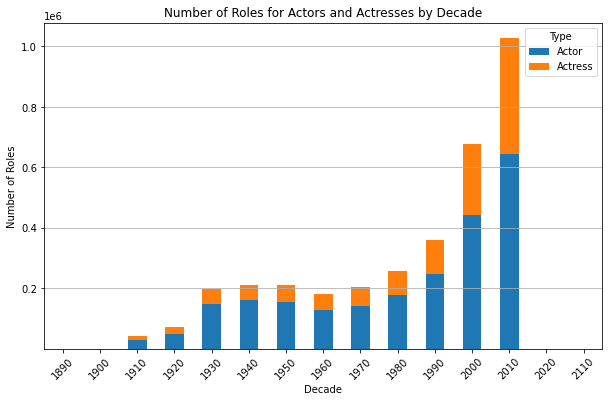

In [98]:
# Filter the dataframe for entries corresponding to actor/actress roles
actor_actress_roles = cast[(cast['type'] == 'actor') | (cast['type'] == 'actress')]

# Define a function to categorize the decade based on the year
def categorize_decade(year):
    return (year // 10) * 10

# Apply the function to create a new column 'decade' representing the decade
actor_actress_roles['decade'] = actor_actress_roles['year'].apply(categorize_decade)

# Group the data by decade and count the number of roles
roles_by_decade = actor_actress_roles.groupby(['decade', 'type']).size().unstack()

# Plot the output
roles_by_decade.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Number of Roles for Actors and Actresses by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Roles')
plt.xticks(rotation=45)
plt.legend(title='Type', labels=['Actor', 'Actress'])
plt.grid(axis='y')
plt.show()

### 21. Determine and comment on the day of the week that movies are released. What is notable about release days and months throughout the year? (Use pd.pivot_table)

In [100]:
dates['date'] = pd.to_datetime(dates['date'])

# Extract the day of the week and month from the 'date' column
dates['day_of_week'] = dates['date'].dt.day_name()
dates['month'] = dates['date'].dt.month_name()

# Create a pivot table to summarize the data
release_summary = pd.pivot_table(dates, index='day_of_week', columns='month', aggfunc='size', fill_value=0)

# Rearrange columns for better visualization
release_summary = release_summary[['January', 'February', 'March', 'April', 'May', 'June', 
                                   'July', 'August', 'September', 'October', 'November', 'December']]

# Print the pivot table
print("Release Day and Month Summary:")
print(release_summary)

Release Day and Month Summary:
month        January  February  March  April    May   June   July  August  \
day_of_week                                                                 
Friday         13734     13833  15268  13559  13198  11997  11635   13430   
Monday          3699      3138   3383   3168   3050   2337   2267    2844   
Saturday        2925      2395   2742   2868   2270   2409   2291    2277   
Sunday          1822      1277   1228   1358   1165   1031    894    1138   
Thursday       10746     10356  11844  10625  10100   9469   8947    9931   
Tuesday         1823      1190   1313   1446   1377   1179   1144    1121   
Wednesday       4663      4118   4479   4650   4289   4282   4243    4270   

month        September  October  November  December  
day_of_week                                          
Friday           14523    14893     14084     13020  
Monday            3161     3551      3372      3240  
Saturday          2551     2700      2547      3357  
Sunda

The pivot table shows the distribution of movie releases across days of the week. Typically, movies are released more frequently on Fridays, followed by Thursdays. This pattern aligns with the practice of releasing movies towards the end of the week to capitalize on weekend box office revenues. The distribution of movie releases across months varies, with certain months having higher numbers of releases than others. March and October have a higher number of movie releases compared to other months.

### 22. Can you plot the pivot table? Is the output "correct"? Can you fix it?

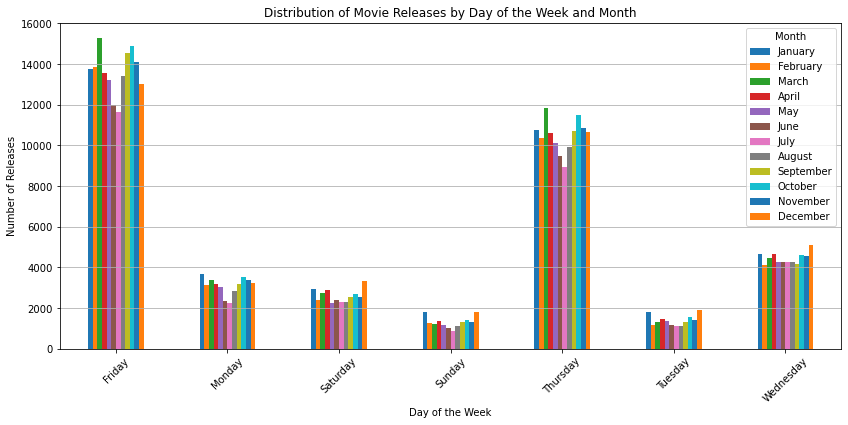

In [102]:
release_summary.plot(kind='bar', figsize=(14, 6))
plt.title('Distribution of Movie Releases by Day of the Week and Month')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45)
plt.legend(title='Month')
plt.grid(axis='y')
plt.show()

### 23. What films did actors in Star Wars go on to appear in? 

In [112]:
star_wars_actors = cast[cast['title'].str.contains('Star Wars', case=False)]['name'].unique()

In [113]:
other_films = cast[cast['name'].isin(star_wars_actors) & ~cast['title'].str.contains('Star Wars', case=False)]

In [114]:
print(other_films['title'].unique())

['Addams Family Values' 'Blasphemy the Movie' 'Chromiumblue.com' ...
 'Enemies Closer' 'Stranded Pearl' 'The Crop']
